# Совместный проект

## Тема проекта: Турецкая недвижимость

## Суть проекта: Создания модели для прогноза стоимости турецкой недвижимости

## План работы:
- #### Анализ исходного датасета
- #### Предварительная обработка датасета
- #### Создание дашборда
- #### Обучение модели
- #### Прогноз данных
- #### Создание приложение

## Анализ исходного датасета

### Подключение необходимых библиотек

In [123]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pickle import dump
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import RidgeCV, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

In [125]:
import warnings
warnings.filterwarnings("ignore")

### Загрузка датасета

In [128]:
df = pd.read_csv('data/real_estate_data.csv', low_memory=False)

In [129]:
df.shape

(403487, 17)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

Вывели информацию о датасете: size, furnished, price имеют тип данных float64; id, listing_type, tom имеют тип данных int64, остальные столбцы object. Имеются пустые значения, также столбец furnished полностью пустой его можно будет удалить. Всего 17 признаков и 403487 строк.

In [132]:
df

id   type  sub_type start_date  end_date  listing_type  tom  \
0            1  Konut  Rezidans   12/10/18    1/9/19             2   30   
1            2  Konut     Daire    2/13/19       NaN             1   14   
2            3  Konut     Daire    10/9/18   11/8/18             1   30   
3            4  Konut  Rezidans    9/10/18  10/10/18             1   30   
4            5  Konut  Rezidans   12/10/18    1/9/19             1   30   
...        ...    ...       ...        ...       ...           ...  ...   
403482  403483  Konut     Daire    9/18/18       NaN             2  162   
403483  403484  Konut     Daire   10/11/18       NaN             1  139   
403484  403485  Konut     Daire   11/22/18       NaN             1   97   
403485  403486  Konut     Daire    2/21/19       NaN             2    6   
403486  403487  Konut     Daire    1/15/19   1/18/19             1    3   

       building_age total_floor_count      floor_no room_count   size  \
0                 0       20 ve üzeri             2        2+1  90.00   
1                 0       20 ve üzeri   20 ve üzeri        1+0  43.00   
2                 0                 1  Yüksek Giriş        2+1    NaN   
3                 3       20 ve üzeri   20 ve üzeri        6+1 450.00   
4                 0       20 ve üzeri             2        2+1  90.00   
...             ...               ...           ...        ...    ...   
403482          NaN               NaN           NaN          +    NaN   
403483          NaN               NaN           NaN        2+1    NaN   
403484          NaN               NaN           NaN        1+1    NaN   
403485          NaN               NaN           NaN        2+1   2.00   
403486          NaN               NaN           NaN        3+1 140.00   

                             address  furnished heating_type       price  \
0         İstanbul/Kartal/Kordonboyu        NaN      Fancoil     3500.00   
1         İstanbul/Kartal/Kordonboyu        NaN      Fancoil   490000.00   
2            Tekirdağ/Çorlu/Reşadiye        NaN      Fancoil   155000.00   
3           İstanbul/Beşiktaş/Levent        NaN      Fancoil 32500000.00   
4         İstanbul/Kartal/Kordonboyu        NaN      Fancoil  1450000.00   
...                              ...        ...          ...         ...   
403482     İstanbul/Sultanbeyli/Adil        NaN          NaN     1500.00   
403483  Sakarya/Adapazarı/Cumhuriyet        NaN          NaN   120000.00   
403484          Antalya/Alanya/Saray        NaN          NaN    48000.00   
403485        Aydın/Kuşadası/Türkmen        NaN          NaN      900.00   
403486    Kayseri/Melikgazi/Alpaslan        NaN          NaN   210000.00   

       price_currency  
0                 TRY  
1                 TRY  
2                 TRY  
3                 TRY  
4                 TRY  
...               ...  
403482            TRY  
403483            TRY  
403484            EUR  
403485            TRY  
403486            TRY  

[403487 rows x 17 columns]

## Описание данных

Признаки:

- id - уникальный идентификатор
- type - тип недвижимости
- sub_type - подгруппа недвижимости
- start_date - начала оформление документов недвижимости
- end_date - конец оформление документов недвижимости
- listing_type - тип листинга
- tom - дней на рынке
- building_age - время постройки
- total_floor_count - количество этажей
- floor_no - количество этажей по документам
- room_count - количетсов комнат + гостинная
- size - размер недвижимости в м^2
- address - адрес недвижимости
- furnished - комплектация недвижимости
- heating_type - типы отопления недвижимости
- price - цена недвижимости
- price_currency - валюта цены недвижимости

In [134]:
# сделали формат у дробных значений - 2 знака после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

In [135]:
df.describe()

id  listing_type       tom      size  furnished         price
count 403487.00     403487.00 403487.00 257481.00       0.00     402772.00
mean  201744.00          1.29     57.02    279.35        NaN     354641.66
std   116476.81          0.47     44.36   9429.20        NaN    4809502.70
min        1.00          1.00      0.00      1.00        NaN       -250.00
25%   100872.50          1.00     29.00     85.00        NaN       2500.00
50%   201744.00          1.00     40.00    110.00        NaN     199000.00
75%   302615.50          2.00     90.00    140.00        NaN     342000.00
max   403487.00          3.00    180.00 948235.00        NaN 2000000000.00

- В столбце listing_type 50% данных имеют значение 1(Sale);
- В среднем объявление на рынке висит 57 дней, столбец tom имеет нормальное распределение;
- В столбце size имеются выбросы, их надо будет обработать;
- Столбец furnished можно будет удалить;
- В столбце price можно заметить неправильные данные (-250) и выбросы, которые тоже нужно будет обработать.

In [137]:
# выводим площадь, которая меньше 28
df[(df['size'] < 28)].shape

(738, 17)

In [138]:
# Выводим площадь, которая больше 2500
df[(df['size'] > 2500)].shape

(316, 17)

In [139]:
df[(df['price'] <= 500) & (df['price_currency'] != 'TRY')]

id   type  sub_type start_date  end_date  listing_type  tom  \
1128      1129  Konut     Daire    1/16/19       NaN             2   42   
6595      6596  Konut     Villa   11/13/18   1/13/19             1   61   
15146    15147  Konut     Daire     9/5/18       NaN             2  175   
22789    22790  Konut     Villa    1/28/19       NaN             2   30   
23019    23020  Konut     Villa     9/3/18   9/29/18             2   26   
23333    23334  Konut     Daire    2/17/19       NaN             2   10   
26624    26625  Konut  Rezidans   11/16/18  12/16/18             2   30   
34803    34804  Konut     Villa    2/11/19       NaN             2   16   
36812    36813  Konut     Daire   10/11/18   11/5/18             2   25   
39622    39623  Konut     Daire    2/12/19       NaN             2   15   
47413    47414  Konut     Daire   10/12/18       NaN             2  138   
47713    47714  Konut     Daire    9/24/18  10/28/18             2   34   
47802    47803  Konut     Daire    2/12/19       NaN             2   15   
49173    49174  Konut     Daire    10/5/18       NaN             2  145   
50826    50827  Konut     Daire   10/11/18       NaN             2  139   
52352    52353  Konut     Daire   10/11/18       NaN             2  139   
53262    53263  Konut     Daire   10/23/18       NaN             2  127   
59498    59499  Konut     Daire    2/12/19       NaN             2   15   
60288    60289  Konut     Villa   12/28/18       NaN             2   61   
61430    61431  Konut  Rezidans   11/16/18   2/22/19             2   98   
68394    68395  Konut     Daire    2/12/19       NaN             2   15   
68877    68878  Konut     Daire    2/12/19       NaN             2   15   
69383    69384  Konut     Daire   10/11/18   11/5/18             2   25   
73848    73849  Konut     Daire    11/4/18       NaN             2  115   
76963    76964  Konut     Daire    1/20/19       NaN             2   38   
77705    77706  Konut     Daire    10/8/18       NaN             2  142   
83818    83819  Konut     Daire   10/25/18       NaN             2  125   
87349    87350  Konut     Daire    10/5/18       NaN             2  145   
88827    88828  Konut     Daire   10/11/18       NaN             2  139   
89211    89212  Konut     Daire    2/12/19       NaN             2   15   
92735    92736  Konut     Daire     9/6/18       NaN             2  174   
186350  186351  Konut     Daire   11/19/18       NaN             2  100   
252479  252480  Konut     Daire    9/21/18   9/21/18             2    0   
328709  328710  Konut     Daire    2/18/19       NaN             2    9   
345743  345744  Konut  Rezidans    9/30/18       NaN             1  150   
366454  366455  Konut     Daire    2/12/19       NaN             2   15   
366471  366472  Konut     Daire    2/12/19       NaN             2   15   
366591  366592  Konut     Daire    2/12/19       NaN             2   15   
370081  370082  Konut     Daire   12/12/18  12/12/18             1    0   
373947  373948  Konut     Daire   12/12/18  12/13/18             1    1   
378827  378828  Konut  Rezidans    1/10/19       NaN             2   48   
380615  380616  Konut     Daire    12/3/18       NaN             2   86   
380921  380922  Konut     Villa     9/8/18  11/10/18             2   63   
383398  383399  Konut     Daire    9/10/18       NaN             2  170   
398342  398343  Konut     Daire    1/20/19       NaN             2   38   
398664  398665  Konut     Daire    9/26/18       NaN             2  154   
400400  400401  Konut     Villa     9/8/18   11/6/18             2   59   
401193  401194  Konut     Daire    9/12/18       NaN             2  168   
402194  402195  Konut     Daire    9/26/18       NaN             2  154   

       building_age total_floor_count    floor_no room_count   size  \
1128              1                 2  Bahçe katı        2+1 110.00   
6595              0                 2         NaN        2+1  75.00   
15146   16-20 arası                 4       Kot 

In [140]:
# Выводим строку, где цена больше или равна 5000000
df[df['price'] >= 5000000]

id   type     sub_type start_date  end_date  listing_type  tom  \
3            4  Konut     Rezidans    9/10/18  10/10/18             1   30   
19          20  Konut     Rezidans    9/10/18   2/11/19             1  154   
59          60  Konut     Rezidans   10/11/18  12/14/18             1   64   
66          67  Konut     Rezidans   10/11/18  11/11/18             1   31   
73          74  Konut        Villa    10/9/18       NaN             1  141   
...        ...    ...          ...        ...       ...           ...  ...   
402747  402748  Konut     Rezidans    1/29/19    2/8/19             1   10   
402817  402818  Konut  Çiftlik Evi    8/31/18  10/30/18             1   60   
402967  402968  Konut        Villa    1/23/19       NaN             1   35   
403308  403309  Konut  Müstakil Ev    9/12/18   10/7/18             1   25   
403365  403366  Konut        Daire   12/18/18  12/18/18             1    0   

       building_age total_floor_count     floor_no room_count   size  \
3                 3       20 ve üzeri  20 ve üzeri        6+1 450.00   
19                3       20 ve üzeri  20 ve üzeri        6+1 450.00   
59                0       20 ve üzeri  20 ve üzeri        3+1    NaN   
66       6-10 arası       20 ve üzeri            2        4+1    NaN   
73                0                 3          NaN        3+2    NaN   
...             ...               ...          ...        ...    ...   
402747          NaN               NaN          NaN        7+2 440.00   
402817          NaN               NaN          NaN        6+2    NaN   
402967          NaN               NaN          NaN        5+2 500.00   
403308          NaN               NaN          NaN        6+3    NaN   
403365          NaN               NaN          NaN        2+1  90.00   

                             address  furnished heating_type       price  \
3           İstanbul/Beşiktaş/Levent        NaN      Fancoil 32500000.00   
19          İstanbul/Beşiktaş/Levent        NaN      Fancoil 32500000.00   
59        İstanbul/Şişli/Mecidiyeköy        NaN      Fancoil 10500000.00   
66       İstanbul/Beşiktaş/Nisbetiye        NaN      Fancoil  9750000.00   
73                İzmir/Çeşme/Dalyan        NaN      Fancoil 12500000.00   
...                              ...        ...          ...         ...   
402747   İstanbul/Bakırköy/Şenlikköy        NaN          NaN 17500000.00   
402817      İzmir/Bayındır/Yakapınar        NaN          NaN  6000000.00   
402967   İstanbul/Sarıyer/Ferahevler        NaN          NaN 15550000.00   
403308        Aydın/Kuşadası/Soğucak        NaN          NaN  5500000.00   
403365  İstanbul/Sarıyer/Zekeriyaköy        NaN          NaN 31234123.00   

       price_currency  
3                 TRY  
19                TRY  
59                TRY  
66                TRY  
73                TRY  
...               ...  
402747            TRY  
402817            TRY  
402967            TRY  
403308            TRY  
403365            TRY  

[1989 rows x 17 columns]

In [141]:
df.describe(include=['object'])

type sub_type start_date  end_date building_age total_floor_count  \
count   403487   403487     403487    266298       376097            375466   
unique       1       12        181       181           14                12   
top      Konut    Daire   10/11/18  12/19/18            0                 4   
freq    403487   354549       4064      3048       140174             83082   

       floor_no room_count                  address      heating_type  \
count    368191     403487                   403487            375517   
unique       35         37                     7842                16   
top           2        3+1  Balıkesir/Edremit/Akçay  Kombi (Doğalgaz)   
freq      65864     157363                     5611            204150   

       price_currency  
count          402772  
unique              4  
top               TRY  
freq           400677

In [142]:
list_columns_name = ['sub_type', 'start_date', 'end_date', 'building_age', 'total_floor_count', 'floor_no', 'room_count', 'heating_type', 'price_currency']
for col in list_columns_name:
    print(f'Признак "{col}" уникальные значения: {df[col].unique()}')

Признак "sub_type" уникальные значения: ['Rezidans' 'Daire' 'Villa' 'Müstakil Ev' 'Kooperatif' 'Yazlık'
 'Komple Bina' 'Prefabrik Ev' 'Köşk / Konak / Yalı' 'Çiftlik Evi'
 'Yalı Dairesi' 'Loft']
Признак "start_date" уникальные значения: ['12/10/18' '2/13/19' '10/9/18' '9/10/18' '11/9/18' '1/4/19' '10/3/18'
 '2/16/19' '12/26/18' '11/13/18' '1/5/19' '9/13/18' '9/22/18' '10/2/18'
 '11/22/18' '9/20/18' '11/23/18' '10/13/18' '11/1/18' '12/5/18' '10/14/18'
 '11/5/18' '12/25/18' '1/24/19' '10/8/18' '10/10/18' '11/2/18' '2/20/19'
 '10/23/18' '1/11/19' '1/16/19' '11/10/18' '11/30/18' '11/28/18'
 '12/11/18' '9/19/18' '2/19/19' '12/20/18' '10/11/18' '9/21/18' '11/8/18'
 '2/26/19' '9/5/18' '1/10/19' '12/19/18' '10/12/18' '10/28/18' '2/23/19'
 '2/4/19' '2/21/19' '1/7/19' '11/7/18' '11/15/18' '1/21/19' '10/20/18'
 '2/2/19' '9/25/18' '1/12/19' '10/26/18' '11/16/18' '2/27/19' '2/25/19'
 '11/20/18' '10/29/18' '9/9/18' '2/6/19' '9/4/18' '10/24/18' '9/28/18'
 '12/12/18' '12/16/18' '12/24/18' '10/15/18' '1

Вывели все уникальные значения по строковым признакам

In [144]:
# Выводим строки, в которых столбец room_count имеет значения "+" или "0+0"
df[(df.room_count == '+') | (df.room_count == '0+0')]

id   type     sub_type start_date end_date  listing_type  tom  \
107        108  Konut  Komple Bina    1/16/19  1/16/19             1    0   
259        260  Konut  Komple Bina    1/16/19  1/16/19             1    0   
495        496  Konut  Komple Bina   11/21/18      NaN             2   98   
499        500  Konut  Komple Bina    2/27/19      NaN             1    0   
515        516  Konut  Komple Bina    10/1/18   2/6/19             1  128   
...        ...    ...          ...        ...      ...           ...  ...   
403431  403432  Konut        Daire   10/30/18      NaN             1  120   
403449  403450  Konut        Daire   10/13/18      NaN             1  137   
403470  403471  Konut     Rezidans    1/12/19      NaN             1   46   
403481  403482  Konut        Daire    1/12/19      NaN             1   46   
403482  403483  Konut        Daire    9/18/18      NaN             2  162   

       building_age total_floor_count floor_no room_count   size  \
107               2                 6      NaN          + 225.00   
259               2                 6      NaN          + 225.00   
495               0                 4      NaN          + 905.00   
499      6-10 arası                 4      NaN          + 200.00   
515      6-10 arası                 4      NaN          +    NaN   
...             ...               ...      ...        ...    ...   
403431          NaN               NaN      NaN          +    NaN   
403449          NaN               NaN      NaN          +    NaN   
403470          NaN               NaN      NaN          +    NaN   
403481          NaN               NaN      NaN          +    NaN   
403482          NaN               NaN      NaN          +    NaN   

                                    address  furnished heating_type  \
107     Ankara/Elmadağ/Hasanoğlan Havuzbaşı        NaN      Fancoil   
259     Ankara/Elmadağ/Hasanoğlan Havuzbaşı        NaN      Fancoil   
495            Kocaeli/İzmit/Alikahya Fatih        NaN          Yok   
499                   Kocaeli/Gebze/Gaziler        NaN          Yok   
515          İzmir/Bayraklı/Fuat Edip Baksı        NaN          Yok   
...                                     ...        ...          ...   
403431               İstanbul/Beşiktaş/Akat        NaN          NaN   
403449               İstanbul/Fatih/Alemdar        NaN          NaN   
403470             İstanbul/Maltepe/Cevizli        NaN          NaN   
403481              İzmir/Menemen/Zeytinlik        NaN          NaN   
403482            İstanbul/Sultanbeyli/Adil        NaN          NaN   

            price price_currency  
107     757878.00            GBP  
259     757878.00            GBP  
495      12500.00            TRY  
499    1650000.00            TRY  
515    1300000.00            TRY  
...           ...            ...  
403431        NaN            NaN  
403449        NaN            NaN  
403470        NaN            NaN  
403481        NaN            NaN  
403482    1500.00            TRY  

[2899 rows x 17 columns]

In [145]:
df[df.address.str.contains('^.+[/].+[/].+$')].shape

(403471, 17)

In [146]:
# Выводим общее кол-во данных в столбце floor_no
df['floor_no'].value_counts()

floor_no
2               65864
3               52690
1               46756
4               34465
Yüksek Giriş    24045
5               21193
Müstakil        21165
Bahçe katı      19065
Giriş Katı      10431
6                9747
7                7698
8                6099
Kot 1            5036
Kot 2            4987
9                4855
10               3863
Kot 3            3793
Çatı Katı        3566
Zemin Kat        3441
Komple           2958
11               2894
12               2309
Kot 4            2269
13               1702
20 ve üzeri      1563
14               1328
15                911
En Üst Kat        894
Bodrum Kat        815
16                600
17                373
18                334
Teras Kat         293
19                177
Asma Kat           12
Name: count, dtype: int64

## Предварительная обработка датасета

In [155]:
# Создаем датасет с закодированными данными о сезоне
df_season = pd.DataFrame({'id_season': [1, 2, 3, 4], 'season' : ['Зима', 'Весна', 'Лето', 'Осень']})
df_season


id_season season
0          1   Зима
1          2  Весна
2          3   Лето
3          4  Осень

In [156]:
# Создаем датасет с закодированными данными о подгруппе недвижимости
df_sub_type = pd.DataFrame({'id_sub_type': [i for i in range(1, 4)], 'sub_type' : ['Квартира', 'Частные дома', 'Полное здание']})
df_sub_type

id_sub_type       sub_type
0            1       Квартира
1            2   Частные дома
2            3  Полное здание

In [158]:
# Создаем датасет с закодированными данными о типе отопит. системы
df_heating_type = pd.DataFrame({'heating_type_id': [i for i in range(1, 17)], 'heating_type' : ['Комбинированный котел (природный газ)','Кондиционирование','Центральная система (счетчик тепла)','Центральная система','Отопление (природный газ)','Плита (уголь)','Теплый пол','Нет','Теплый пол','Комбинированный котел (электрический)','Плита (природный газ)','Солнечная энергия','Отопление (уголь)','Геотермальная энергия','Фанкойл','Отопление (мазут)']})
df_heating_type

heating_type_id                           heating_type
0                 1  Комбинированный котел (природный газ)
1                 2                      Кондиционирование
2                 3    Центральная система (счетчик тепла)
3                 4                    Центральная система
4                 5              Отопление (природный газ)
5                 6                          Плита (уголь)
6                 7                             Теплый пол
7                 8                                    Нет
8                 9                             Теплый пол
9                10  Комбинированный котел (электрический)
10               11                  Плита (природный газ)
11               12                      Солнечная энергия
12               13                      Отопление (уголь)
13               14                  Геотермальная энергия
14               15                                Фанкойл
15               16                      Отопление (мазут)

In [159]:
# Создаем датасет с закодированными данными о валюте
df_price_currency = pd.DataFrame({'price_currency_id': [i for i in range(1, 5)], 'price_currency' : ['TRY', 'GBP', 'EUR', 'USD']})
df_price_currency

price_currency_id price_currency
0                  1            TRY
1                  2            GBP
2                  3            EUR
3                  4            USD

In [160]:
# Создаем датасет с закодированными данными о номере этажа
df_floor_no = pd.DataFrame({'floor_no_id': [i for i in range(1, 37)], 'floor_no' : [str(i) for i in range(1, 21)] + ['Высокий вход', 'Частный', 'Cадовый пол', 'Нулевой этаж', 'Как 1', 'Как 2', 'Как 3', 'Как 4', 'Пентхаус', 'Цокольный этаж', 'Жилой комплекс', '20 и выше', 'Верхний этаж', 'Подвальный этаж', 'Терраса', '	Антресоль']})
df_floor_no

floor_no_id         floor_no
0             1                1
1             2                2
2             3                3
3             4                4
4             5                5
5             6                6
6             7                7
7             8                8
8             9                9
9            10               10
10           11               11
11           12               12
12           13               13
13           14               14
14           15               15
15           16               16
16           17               17
17           18               18
18           19               19
19           20               20
20           21     Высокий вход
21           22          Частный
22           23      Cадовый пол
23           24     Нулевой этаж
24           25            Как 1
25           26            Как 2
26           27            Как 3
27           28            Как 4
28           29         Пентхаус
29           30   Цокольный этаж
30           31   Жилой комплекс
31           32        20 и выше
32           33     Верхний этаж
33           34  Подвальный этаж
34           35          Терраса
35           36      \tАнтресоль

In [162]:
# Создаем датасет с закодированными данными о возрасте постройки
df_building_age = pd.DataFrame({'building_age_id': [i for i in range(1, 15)], 'building_age' : [str(i) for i in range(6)] + ['От 6 до 10', 'Между 11 и 15', 'От 16 до 20 лет', 'Между 21 и 25', 'Между 26 и 30', 'Между 31 и 35', 'От 36 до 40', '40 и старше']})
df_building_age

building_age_id     building_age
0                 1                0
1                 2                1
2                 3                2
3                 4                3
4                 5                4
5                 6                5
6                 7       От 6 до 10
7                 8    Между 11 и 15
8                 9  От 16 до 20 лет
9                10    Между 21 и 25
10               11    Между 26 и 30
11               12    Между 31 и 35
12               13      От 36 до 40
13               14      40 и старше

In [163]:
# Функция определяет сезон года на основе даты в формате 'MM/DD/YYYY'
def find_season_of_year(date: str | int) -> int:
    if pd.isna(date):
        return 0
    month = date.split('/')[0]
    if month in ['1', '2', '12']:
        return 1
    if month in ['3', '4', '5']:
        return 2
    if month in ['6', '7', '8']:
        return 3
    return 4

# Функция преобразует тип недвижимости в числовой идентификатор
def find_sub_type_id(type: str) -> int:
    dict_sub_type = {'Daire' : 1, 'Villa' : 2, 'Müstakil Ev' : 2, 'Rezidans' : 3, 'Yazlık' : 2, 'Komple Bina' : 3, 'Prefabrik Ev': 2, 'Çiftlik Evi': 2, 'Köşk / Konak / Yalı' : 3, 'Yalı Dairesi' : 1, 'Kooperatif' : 3, 'Loft' : 2}
    return dict_sub_type[type]

# Функция преобразует тип отопления в числовой идентификатор
def find_heating_type_id(type: str) -> int:
    dict_heating_type = {'Kombi (Doğalgaz)' : 1, 'Klima' : 2, 'Merkezi Sistem (Isı Payı Ölçer)' : 3, 'Merkezi Sistem' : 4, 'Kalorifer (Doğalgaz)' : 5, 'Soba (Kömür)' : 6, 'Yerden Isıtma': 7, 'Yok': 8, 'Kat Kaloriferi' : 9, 'Kombi (Elektrikli)' : 10, 'Soba (Doğalgaz)' : 11, 'Güneş Enerjisi' : 12, 'Kalorifer (Kömür)' : 13, 'Jeotermal' : 14, 'Fancoil' : 15, 'Kalorifer (Akaryakıt)' : 16}
    return dict_heating_type[type]

# Функция преобразует валюту в числовой идентификатор
def find_price_currency_id(price_currency: str) -> int:
    dict_price_currency = {'TRY' : 1, 'GBP' : 2, 'EUR' : 3, 'USD' : 4}
    return dict_price_currency[price_currency]

# Функция преобразует номер этажа в числовой идентификатор
def find_floor_no_id(floor_no: str) -> int:
    lst_data = ['Yüksek Giriş', 'Müstakil', 'Bahçe katı', 'Giriş Katı', 'Kot 1', 'Kot 2', 'Kot 3', 'Kot 4', 'Çatı Katı', 'Zemin Kat', 'Komple', '20 ve üzeri', 'En Üst Kat', 'Bodrum Kat', 'Teras Kat', 'Asma Kat']
    dict_floor_no = {str(i) : i for i in range(1, 21)} | {lst_data[i-21] : i for i in range(21, 37)}
    return dict_floor_no[floor_no]

# Функция преобразует возраст постройки в числовой идентификатор
def find_building_age_id(building_age: str) -> int:
    lst_data = ['6-10 arası', '11-15 arası', '16-20 arası', '21-25 arası', '26-30 arası', '31-35 arası', '36-40 arası', '40 ve üzeri']
    dict_building_age = {str(i) : i + 1 for i in range(6)} | {lst_data[i] : i + 6 for i in range(8)}
    return dict_building_age[building_age]

In [165]:
# Заполняем пустые значения средними в диапазоне от 28 до 2500
df['size'].fillna(df[(df['size'] >= 28) & (df['size'] <= 1000)]['size'].mean(), inplace=True)

In [166]:
# Удаляем значения площади которые меньше 28 и больше 2500
df = df[(df['size'] >= 28) & (df['size'] <= 1000)]

In [167]:
# Удаляем аномально низкие цены в турецких лирах
df = df[~((df['price'] <= 500) & (df['price_currency'] == 'TRY'))]

In [168]:
# Удаляем экстремально высокие цены
df = df[df['price'] < 5000000]

In [169]:
df['sub_type_id'] = df['sub_type'].apply(find_sub_type_id)

In [171]:
# Определяем сезон года для даты начала размещения объявления
df['start_season'] = df['start_date'].apply(find_season_of_year)

In [172]:
# Определяем сезон года для даты окончания размещения объявления
df['end_season'] = df['end_date'].apply(find_season_of_year)

In [173]:
# Заменяем нулевые значения сезона окончания на лето (3) по умолчанию
df['end_season'] = df['end_season'].apply(lambda x: x if x != 0 else 3)

In [175]:
df['price_currency_id'] = df['price_currency'].apply(find_price_currency_id)

In [177]:
# Заполняем пропущенные значения типа отопления самым частым значением
df['heating_type'].fillna(df['heating_type'].value_counts().idxmax(), inplace=True)

In [178]:
df['heating_type_id'] = df['heating_type'].apply(find_heating_type_id)

In [179]:
# Удаляем записи с отсутствующей информацией о возрасте здания
df['building_age'].fillna(df[df['building_age'].isna() == False]['building_age'].value_counts().idxmax(), inplace=True)
df['building_age_id'] = df['building_age'].apply(find_building_age_id)

In [188]:
df[df['listing_type'] == 3]['listing_type'] = 2

Применили функции для преобразования в числовой идентифкатор и создали новые столбцы с айдишками

In [195]:
df = df[df['address'].str.contains('^.+[/].+[/].+$')]

In [196]:
# Разбиваем адрес на три компонента: город, округ и район
df[['city', 'county', 'district']] = df['address'].str.split('/', expand=True)

In [198]:
dict_df_address = {}
for col in ['city', 'county', 'district']:
    list_unique = df[col].unique().tolist()
    df_data = pd.DataFrame({'id' : [i for i in range(1, len(list_unique)+ 1)], 'data' : list_unique})
    dict_df_address.setdefault(col, df_data)
    df[f'{col}_id'] = df[col].apply(lambda x: int(df_data.loc[df_data['data'] == x, 'id']))

закодировали адрес и получили новые столбцы city_id, country_id, district_id

In [201]:
dict_df_address['city']

id       data
0    1   İstanbul
1    2   Tekirdağ
2    3      İzmir
3    4  Çanakkale
4    5      Muğla
..  ..        ...
77  78      Siirt
78  79        Muş
79  80      Iğdır
80  81    Bayburt
81  82    Tunceli

[82 rows x 2 columns]

In [202]:
dict_df_address['county']

id           data
0      1         Kartal
1      2          Çorlu
2      3        Maltepe
3      4           Urla
4      5        Ayvacık
..   ...            ...
507  508  Çağlayancerit
508  509     Gürgentepe
509  510      Harmancık
510  511         Akören
511  512       Aydıncık

[512 rows x 2 columns]

In [205]:
dict_df_address['district']

id                    data
0        1              Kordonboyu
1        2                Reşadiye
2        3              Altayçeşme
3        4         M. Fevzi Çakmak
4        5  Küçükkuyu Bld. (Mıhlı)
...    ...                     ...
4718  4719        Ballıbostan Köyü
4719  4720  Süleymandanişment Köyü
4720  4721                  Ulucak
4721  4722               Kırkçeşme
4722  4723                  Gökçen

[4723 rows x 2 columns]

In [206]:
# Удаляем строки с значениями "+" и "0+0"
df = df[(df.room_count != '+') | (df.room_count != '0+0')]

In [209]:
# Разделяем столбец room_count на кол-во спален и гостиных
df[['bedroom_count', 'living_room_count']] = df['room_count'].str.split('+', expand=True)

In [210]:
# Удаляем пустые значения
df = df[(df['bedroom_count'] != '') | (df['living_room_count'] != '')]

In [211]:
# Меняем тип данных на int
df['bedroom_count'] = df['bedroom_count'].apply(lambda x: int(x))

In [213]:
df['living_room_count'] = df['living_room_count'].apply(lambda x: int(x))

In [214]:
# Удаляем дупликаты
df.drop_duplicates(inplace=True)

In [215]:
# Удаляем пустые значения
df = df[df['floor_no'].isna() == False]

In [216]:
df['floor_no_id'] = df['floor_no'].apply(find_floor_no_id)

In [217]:
df.reset_index(inplace=True)

In [218]:
df.drop(['index', 'id', 'sub_type', 'type', 'start_date', 'end_date', 'building_age', 'total_floor_count', 'address', 'furnished', 'heating_type', 'price_currency', 'room_count', 'floor_no', 'city', 'county', 'district'], axis=1, inplace=True)

In [219]:
df

listing_type  tom   size      price  sub_type_id  start_season  \
0                  2   30  90.00    3500.00            3             1   
1                  1   14  43.00  490000.00            1             1   
2                  1   30 123.69  155000.00            1             4   
3                  1   30  90.00 1450000.00            3             1   
4                  1   30  45.00  780000.00            3             4   
...              ...  ...    ...        ...          ...           ...   
361312             1  103 250.00 1150000.00            2             4   
361313             1   54  55.00  160000.00            1             4   
361314             1   90 100.00  220000.00            1             4   
361315             1   15 110.00  250000.00            1             1   
361316             2   66 300.00    6000.00            1             1   

        end_season  price_currency_id  heating_type_id  building_age_id  \
0                1                  1               15                1   
1                3                  1               15                1   
2                4                  1               15                1   
3                1                  1               15                1   
4                1                  1               15                3   
...            ...                ...              ...              ...   
361312           1                  1                1                1   
361313           1                  1                1                6   
361314           3                  1                1                7   
361315           1                  1                1               11   
361316           3                  1                1                1   

        city_id  county_id  district_id  bedroom_count  living_room_count  \
0             1          1            1              2                  1   
1             1          1            1              1                  0   
2             2          2            2              2                  1   
3             1          1            1              2                  1   
4             1          3            3              1                  1   
...         ...        ...          ...            ...                ...   
361312        3         34          400              4                  1   
361313        6         78          154              1                  1   
361314       12         84          164              2                  1   
361315        3         96          689              3                  1   
361316       19         99         1056              6                  1   

        floor_no_id  
0                 2  
1                32  
2                21  
3                 2  
4                10  
...             ...  
361312           22  
361313            2  
361314           27  
361315            1  
361316           29  

[361317 rows x 16 columns]

Вывели датасет с закодированными данными

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361317 entries, 0 to 361316
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   listing_type       361317 non-null  int64  
 1   tom                361317 non-null  int64  
 2   size               361317 non-null  float64
 3   price              361317 non-null  float64
 4   sub_type_id        361317 non-null  int64  
 5   start_season       361317 non-null  int64  
 6   end_season         361317 non-null  int64  
 7   price_currency_id  361317 non-null  int64  
 8   heating_type_id    361317 non-null  int64  
 9   building_age_id    361317 non-null  int64  
 10  city_id            361317 non-null  int64  
 11  county_id          361317 non-null  int64  
 12  district_id        361317 non-null  int64  
 13  bedroom_count      361317 non-null  int64  
 14  living_room_count  361317 non-null  int64  
 15  floor_no_id        361317 non-null  int64  
dtypes:

In [223]:
df.describe()

listing_type       tom      size      price  sub_type_id  start_season  \
count     361317.00 361317.00 361317.00  361317.00    361317.00     361317.00   
mean           1.28     56.74    121.61  270111.12         1.11          2.87   
std            0.45     43.91     46.24  382694.00         0.37          1.45   
min            1.00      0.00     28.00       5.00         1.00          1.00   
25%            1.00     29.00    100.00    2850.00         1.00          1.00   
50%            1.00     39.00    123.69  200000.00         1.00          4.00   
75%            2.00     90.00    125.00  335000.00         1.00          4.00   
max            3.00    180.00   1000.00 4980000.00         3.00          4.00   

       end_season  price_currency_id  heating_type_id  building_age_id  \
count   361317.00          361317.00        361317.00        361317.00   
mean         2.31               1.01             2.36             4.16   
std          1.25               0.14             2.42             3.09   
min          1.00               1.00             1.00             1.00   
25%          1.00               1.00             1.00             1.00   
50%          3.00               1.00             1.00             4.00   
75%          3.00               1.00             3.00             7.00   
max          4.00               4.00            16.00            13.00   

        city_id  county_id  district_id  bedroom_count  living_room_count  \
count 361317.00  361317.00    361317.00      361317.00          361317.00   
mean      10.77      93.95       760.21           2.64               1.03   
std       13.14      72.27       756.05           0.99               0.20   
min        1.00       1.00         1.00           1.00               0.00   
25%        1.00      37.00       165.00           2.00               1.00   
50%        6.00      78.00       504.00           3.00               1.00   
75%       14.00     141.00      1170.00           3.00               1.00   
max       82.00     496.00      4567.00          10.00               5.00   

       floor_no_id  
count    361317.00  
mean          9.35  
std           9.58  
min           1.00  
25%           2.00  
50%           4.00  
75%          21.00  
max          36.00

In [224]:
df.to_csv('data/new_real_estate_data.csv')

## Анализ готового датасета

In [226]:
df = pd.read_csv('data/new_real_estate_data.csv', low_memory=False)

In [228]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [229]:
df

listing_type  tom   size      price  sub_type_id  start_season  \
0                  2   30  90.00    3500.00            3             1   
1                  1   14  43.00  490000.00            1             1   
2                  1   30 123.69  155000.00            1             4   
3                  1   30  90.00 1450000.00            3             1   
4                  1   30  45.00  780000.00            3             4   
...              ...  ...    ...        ...          ...           ...   
361312             1  103 250.00 1150000.00            2             4   
361313             1   54  55.00  160000.00            1             4   
361314             1   90 100.00  220000.00            1             4   
361315             1   15 110.00  250000.00            1             1   
361316             2   66 300.00    6000.00            1             1   

        end_season  price_currency_id  heating_type_id  building_age_id  \
0                1                  1               15                1   
1                3                  1               15                1   
2                4                  1               15                1   
3                1                  1               15                1   
4                1                  1               15                3   
...            ...                ...              ...              ...   
361312           1                  1                1                1   
361313           1                  1                1                6   
361314           3                  1                1                7   
361315           1                  1                1               11   
361316           3                  1                1                1   

        city_id  county_id  district_id  bedroom_count  living_room_count  \
0             1          1            1              2                  1   
1             1          1            1              1                  0   
2             2          2            2              2                  1   
3             1          1            1              2                  1   
4             1          3            3              1                  1   
...         ...        ...          ...            ...                ...   
361312        3         34          400              4                  1   
361313        6         78          154              1                  1   
361314       12         84          164              2                  1   
361315        3         96          689              3                  1   
361316       19         99         1056              6                  1   

        floor_no_id  
0                 2  
1                32  
2                21  
3                 2  
4                10  
...             ...  
361312           22  
361313            2  
361314           27  
361315            1  
361316           29  

[361317 rows x 16 columns]

start_season
4    223035
1    135787
3      2495
Name: count, dtype: int64


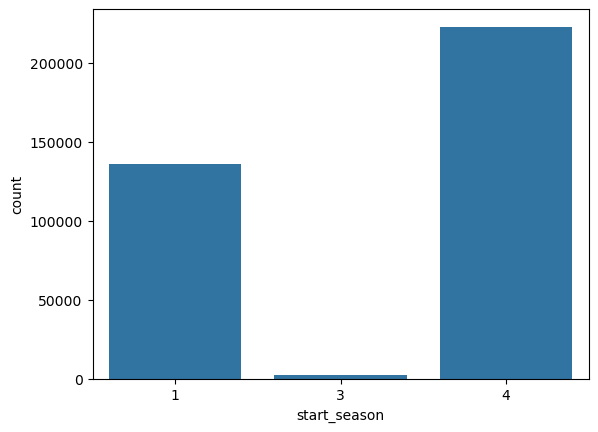

end_season
1    164105
3    119436
4     77776
Name: count, dtype: int64


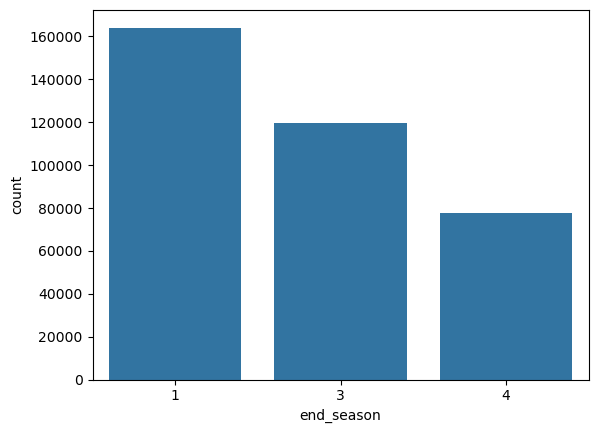

price_currency_id
1    359800
3       735
2       408
4       374
Name: count, dtype: int64


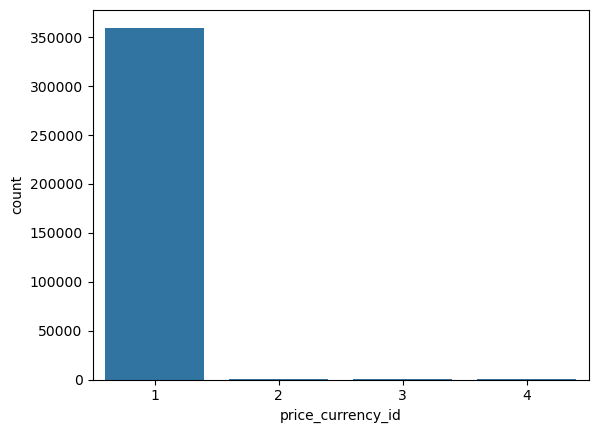

In [230]:
for col in ['start_season', 'end_season', 'price_currency_id']:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.show()

Большинство объявлений публикуется осенью, что может указывать, практически все объявления указаны в лирах, 

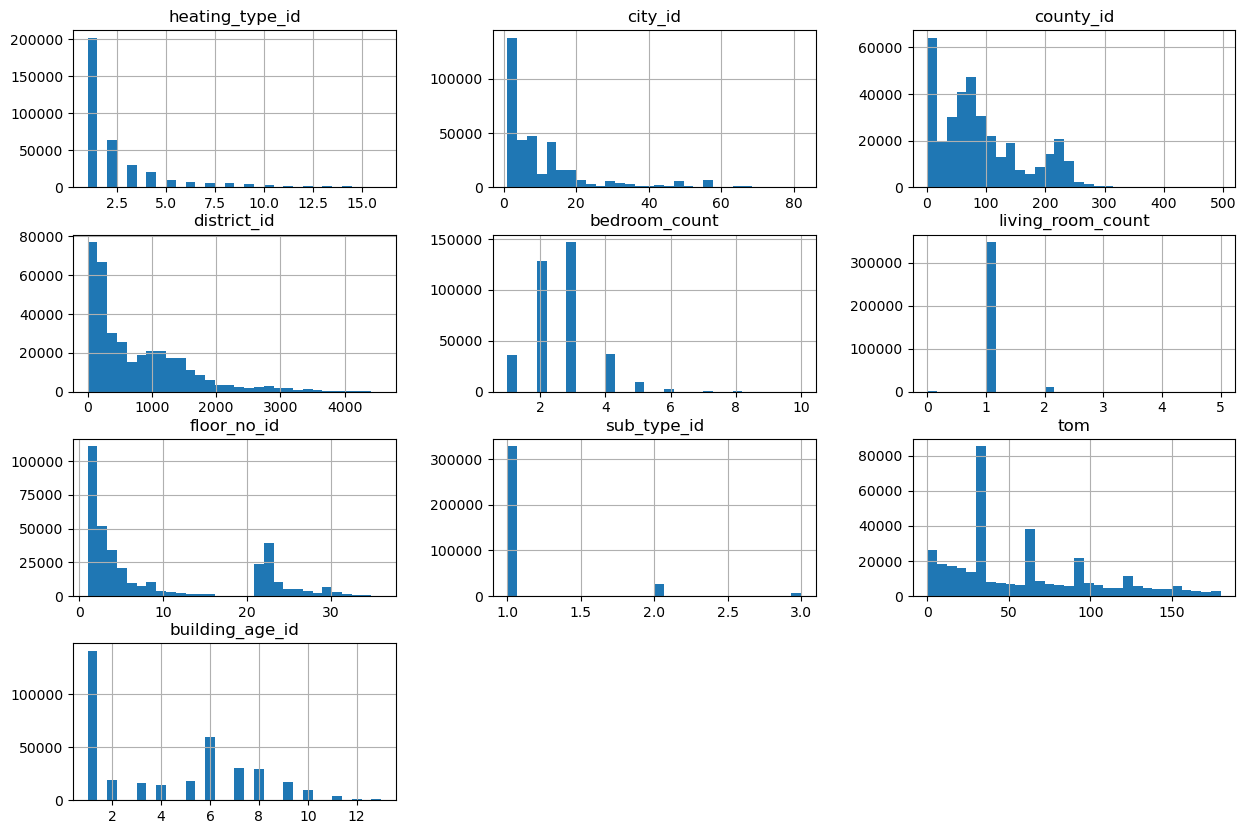

In [233]:
df[['heating_type_id', 'city_id', 'county_id', 'district_id', 'bedroom_count', 'living_room_count', 'floor_no_id', 'sub_type_id', 'tom', 'building_age_id']].hist(figsize = (15,10), bins = 30);

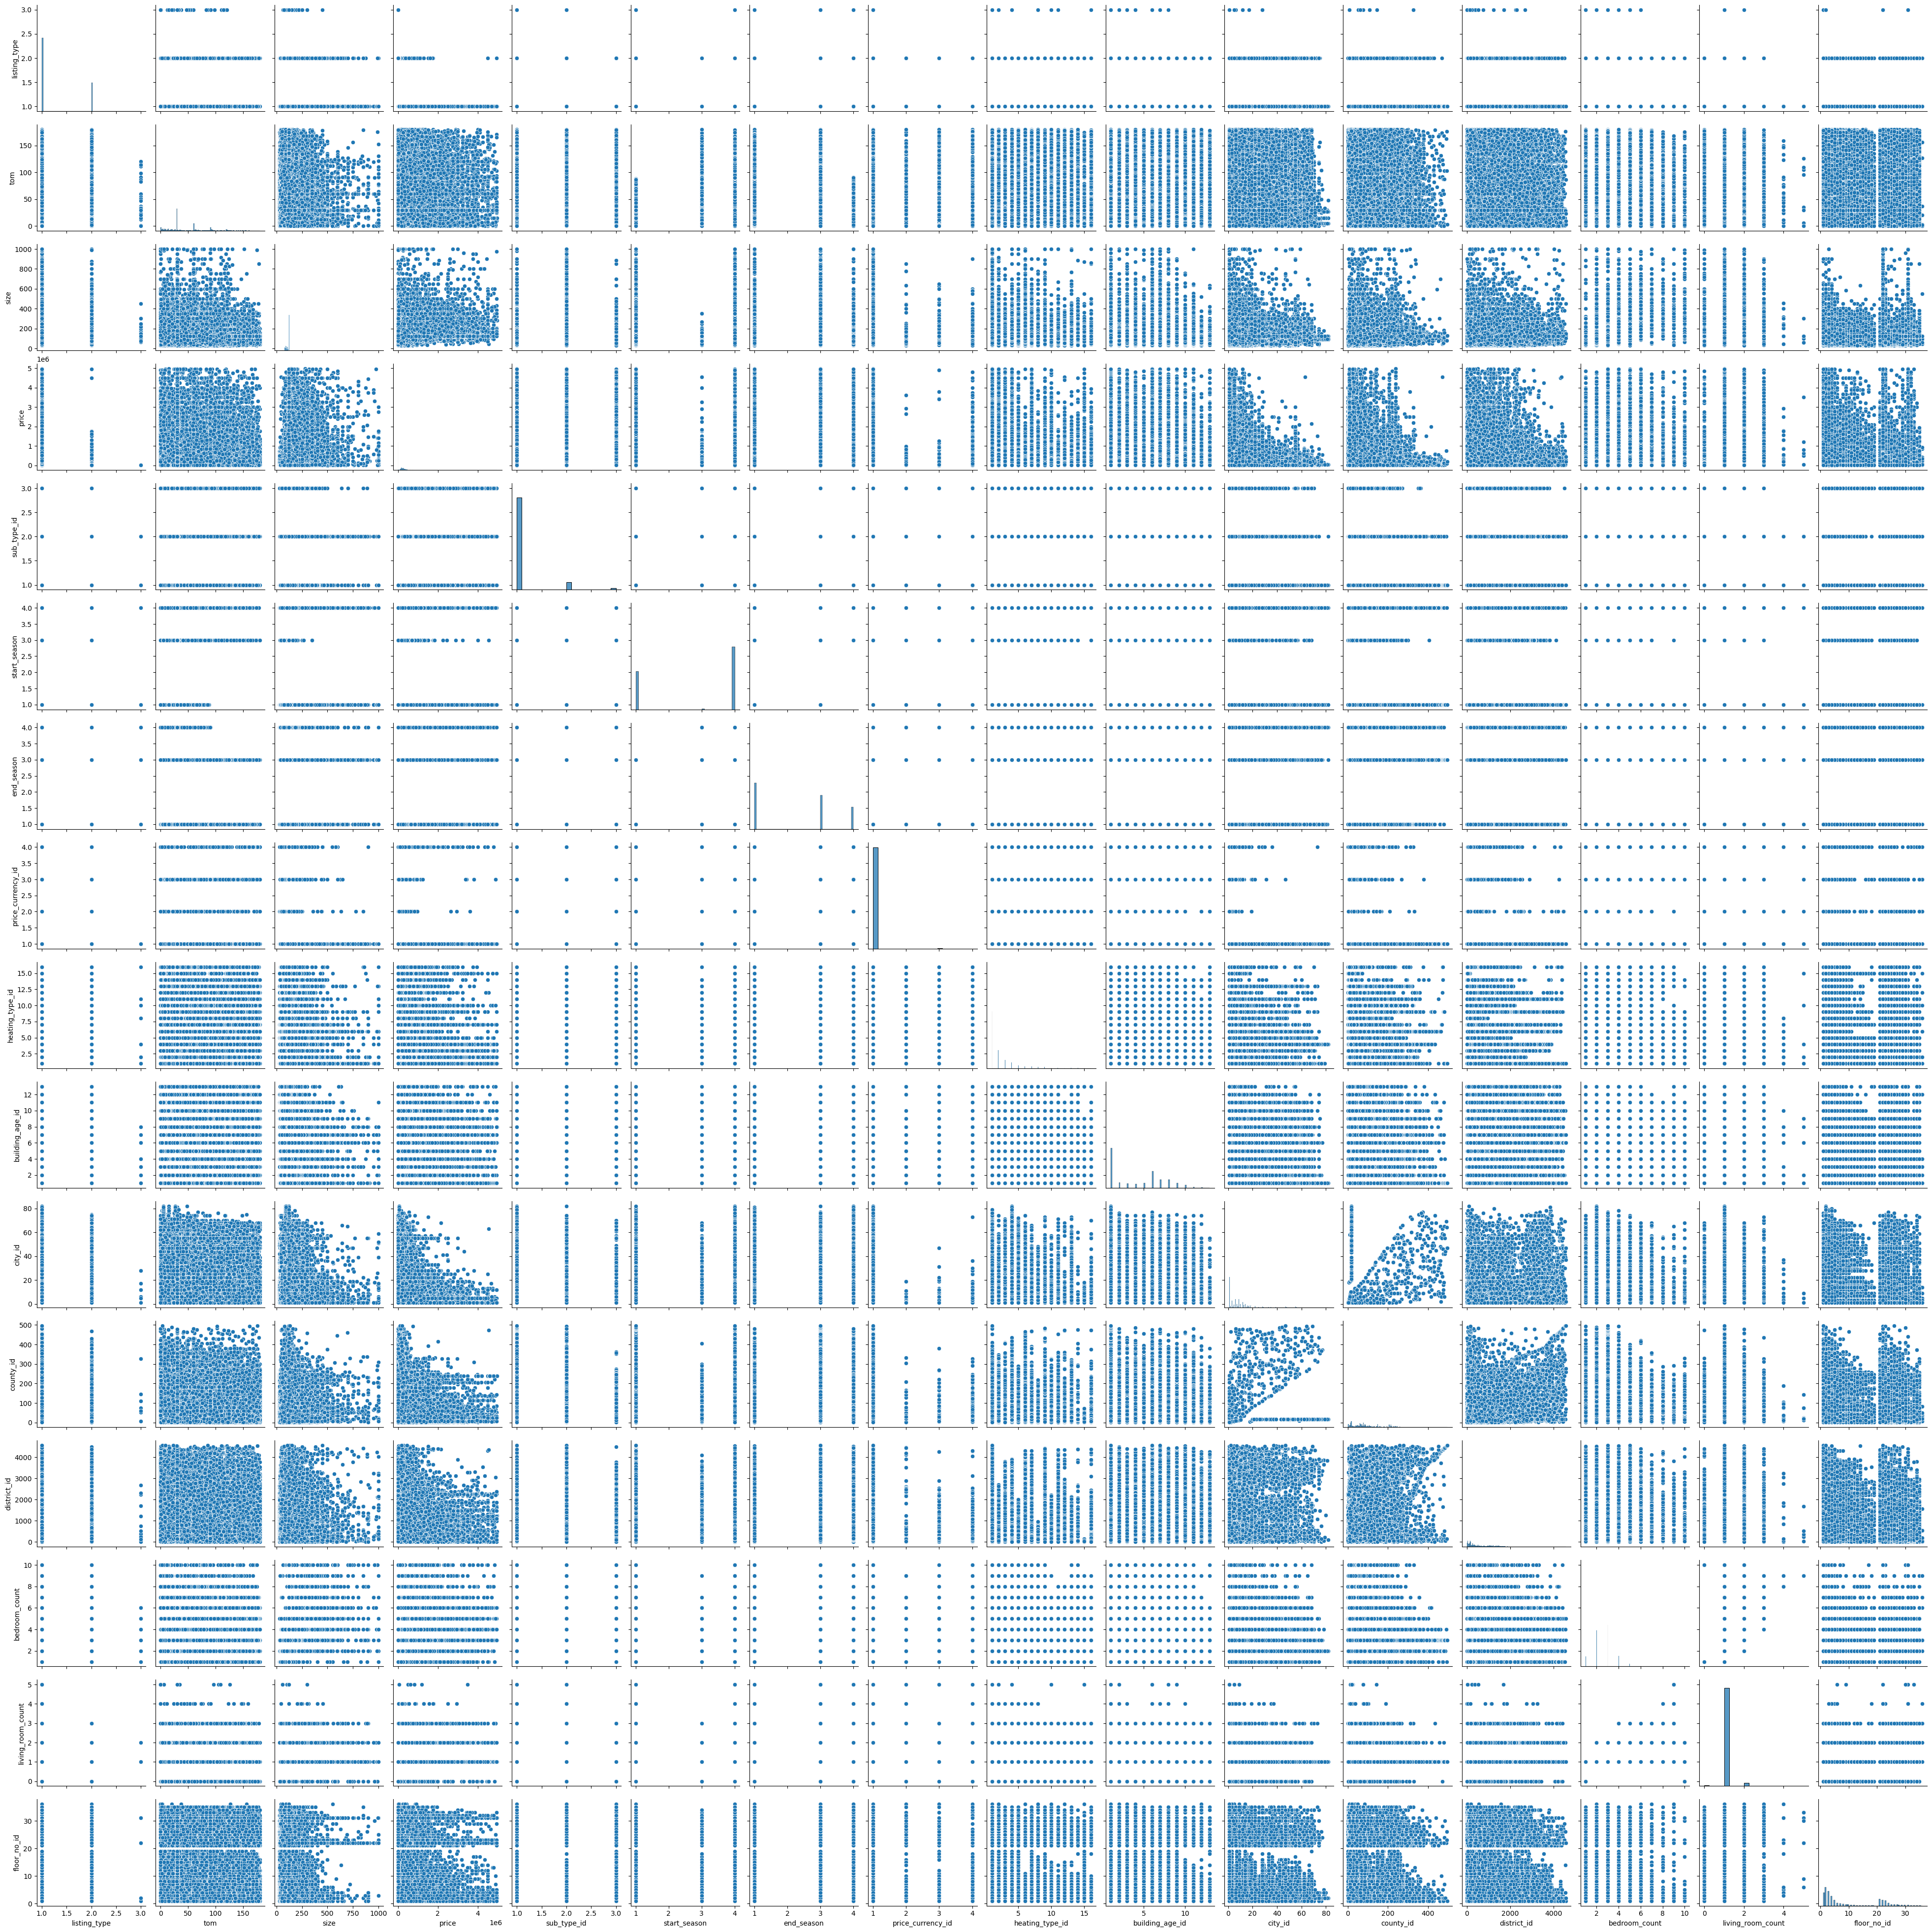

In [234]:
sns.pairplot(df)

<Axes: >

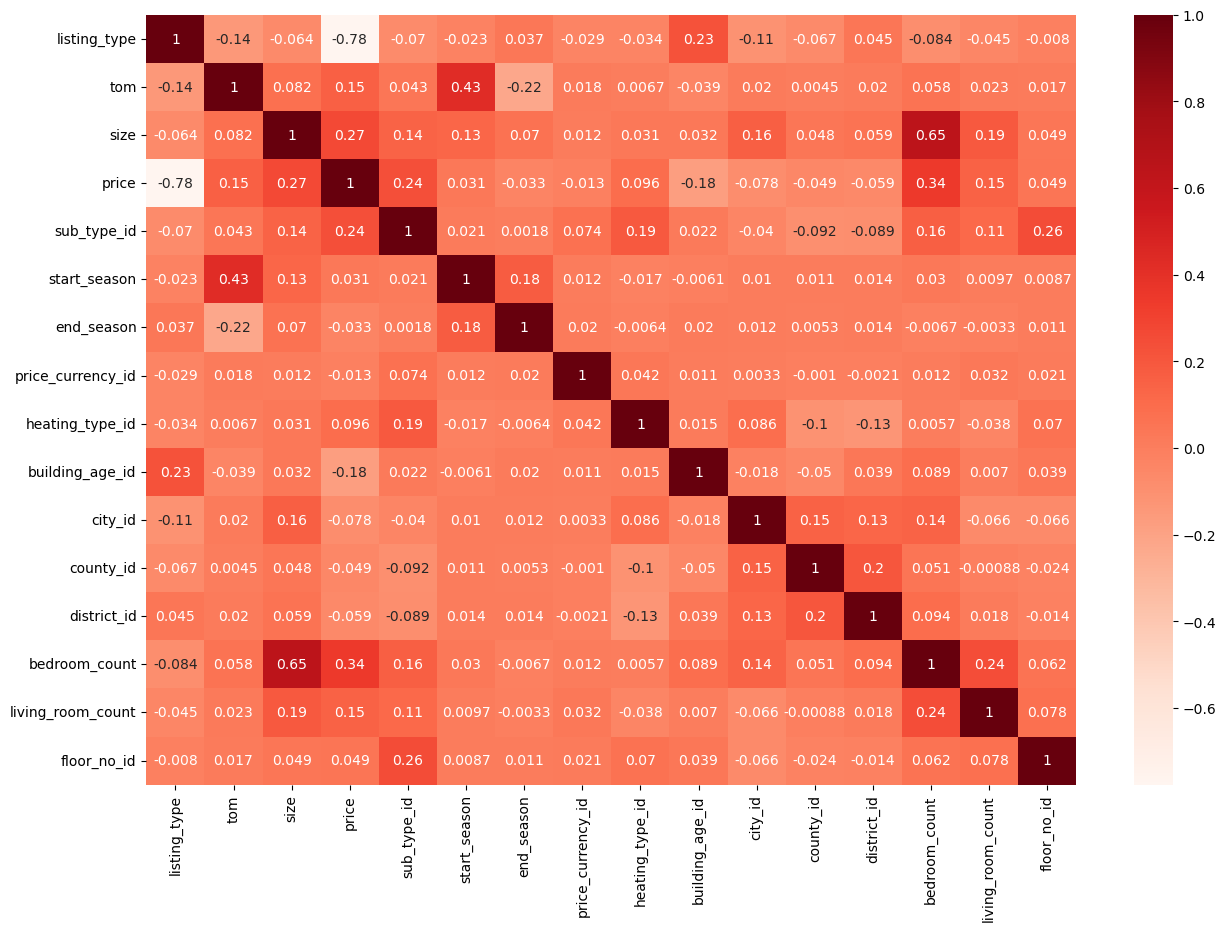

In [235]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='Reds')

Наибольшее влияние на цену (price):
- size (0.28) - площадь сильно влияет на стоимость
- bedroom_count (0.35) - количество спален
- sub_type_id (0.24) - тип недвижимости важен

Сильные взаимосвязи между признаками:
- size и bedroom_count (0.64) - чем больше площадь тем больше спален

## Обучение моделей

In [257]:
# Удаляем целевые и слабокоррелирующие признаки для регрессии
X = df.drop(['price'], axis=1)
# Удаляем только sub_type_id для классификации
X_class = df.drop(['sub_type_id'], axis=1)

In [259]:
# Определяем целевые переменные
y = df['price']
y_class = df['sub_type_id']

In [261]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.33, random_state=42, stratify=y_class)

In [262]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242082, 15) (119235, 15) (242082,) (119235,)


In [265]:
print(X_class_train.shape, X_class_test.shape, y_class_train.shape, y_class_test.shape)

(242082, 15) (119235, 15) (242082,) (119235,)


## Бэггинг(Классификация)

In [268]:
%%time
rfc = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=10)
rfc.fit(X_class_train, y_class_train)
rfc_pred = rfc.predict(X_class_test)

CPU times: total: 6min 54s
Wall time: 42.6 s


In [269]:
print(classification_report(y_class_test, rfc_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99    108287
           2       0.94      0.87      0.91      8735
           3       0.91      0.46      0.61      2213

    accuracy                           0.98    119235
   macro avg       0.94      0.78      0.83    119235
weighted avg       0.98      0.98      0.97    119235



Модель идеально определяет квартиры, достаточно хорошо виллы. Плохо определяет более редкие классы.

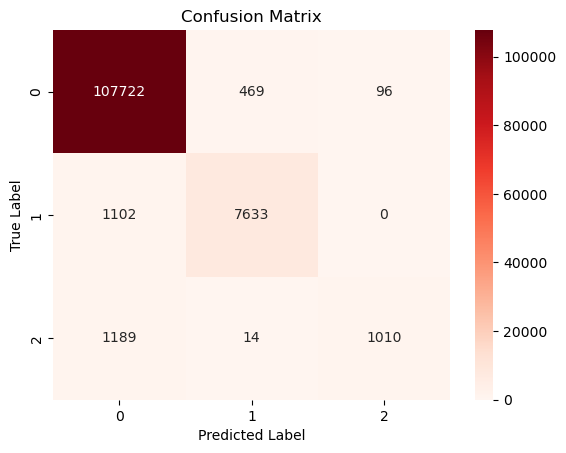

In [271]:
sns.heatmap(confusion_matrix(y_class_test, rfc_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Бустинг(Классификация)

In [293]:
%%time
gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
gbc.fit(X_class_train, y_class_train)
gbc_pred = gbc.predict(X_class_test)

CPU times: total: 6min 7s
Wall time: 6min 8s


In [294]:
print(classification_report(y_class_test, gbc_pred))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98    108287
           2       0.92      0.85      0.88      8735
           3       0.75      0.34      0.47      2213

    accuracy                           0.97    119235
   macro avg       0.88      0.73      0.78    119235
weighted avg       0.97      0.97      0.97    119235



Модель также идеально определяет квартиры и виллы, но предсказывает чуть хуже чем RandomForestClassifier

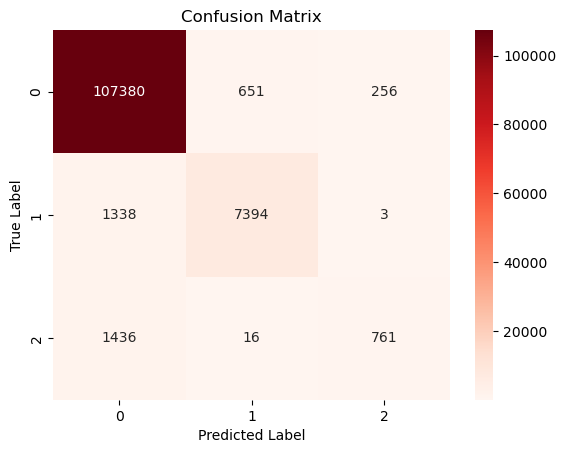

In [296]:
sns.heatmap(confusion_matrix(y_class_test, gbc_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Стэкинг(Классификация)

In [298]:
%%time
sc = StackingClassifier([('rf', RandomForestClassifier()), ('f', GradientBoostingClassifier())], final_estimator=LogisticRegression(), n_jobs=10)
sc.fit(X_class_train, y_class_train)
sc_pred = sc.predict(X_class_test)

CPU times: total: 8.09 s
Wall time: 3min 54s


In [299]:
print(classification_report(y_class_test, sc_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99    108287
           2       0.93      0.88      0.91      8735
           3       0.84      0.54      0.66      2213

    accuracy                           0.98    119235
   macro avg       0.92      0.81      0.85    119235
weighted avg       0.98      0.98      0.98    119235



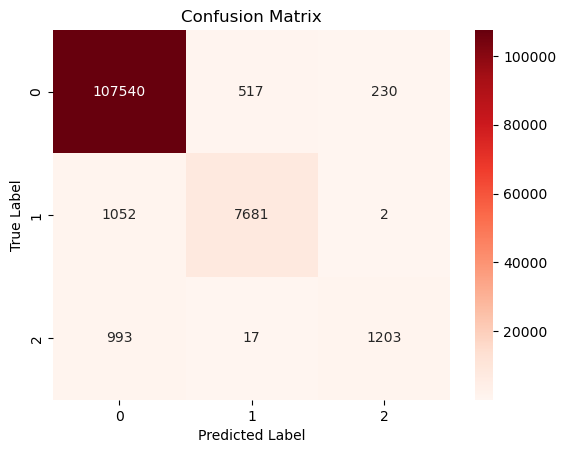

In [300]:
sns.heatmap(confusion_matrix(y_class_test, sc_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

StackingClassifier лучшая модель потому что:
- Выше предсказание по классам(99%, 91%, 66%)
- StackingClassifier показывает более сбалансированные результаты
- GradientBoosting плохо справляется с редкими классами

## Сохранение модели классификации

In [342]:
with open('model/best_model_classification.pkl', 'wb') as f:
    dump(sc, f)

## Бэггинг(Регрессия)

In [302]:
%%time
rfr = RandomForestRegressor(n_estimators=500, n_jobs=10)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

CPU times: total: 18min 35s
Wall time: 1min 53s


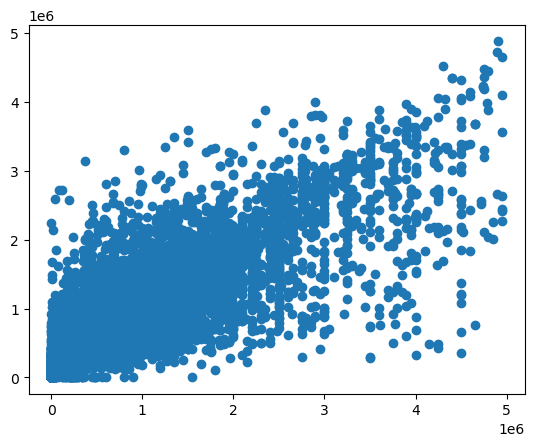

In [303]:
plt.scatter(y_test, rfr_pred)

In [304]:
metrics.mean_absolute_error(y_test, rfr_pred)

58296.64497631574

In [305]:
metrics.mean_squared_error(y_test, rfr_pred)

26894696589.496326

In [306]:
metrics.r2_score(y_test, rfr_pred)

0.8111809570383083

## Бустинг(Регрессия)

In [308]:
%%time
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

CPU times: total: 1min 41s
Wall time: 1min 42s


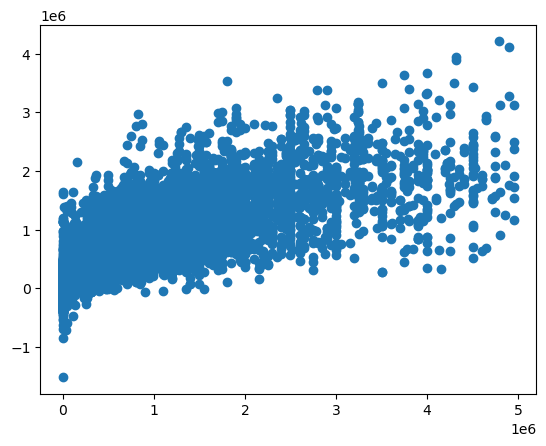

In [309]:
plt.scatter(y_test, gbr_pred)

In [310]:
metrics.mean_absolute_error(y_test, gbr_pred)

94185.1528288614

In [311]:
metrics.mean_squared_error(y_test, gbr_pred)

41938100078.49432

In [312]:
metrics.r2_score(y_test, gbr_pred)

0.7055660436955595

## Стэкинг(Регрессия)

In [314]:
%%time
sr = StackingRegressor([('lr', GradientBoostingRegressor()), ('dtr', DecisionTreeRegressor()), ('svr', LinearSVR(random_state=42))], final_estimator=RandomForestRegressor(), n_jobs=5)
sr.fit(X_train, y_train)
sr_pred = sr.predict(X_test)

CPU times: total: 1min 51s
Wall time: 3min 17s


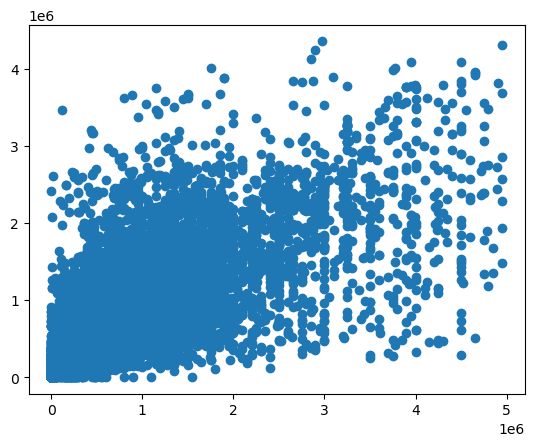

In [315]:
plt.scatter(y_test, sr_pred)

In [316]:
metrics.mean_absolute_error(y_test, sr_pred)

77567.94681983988

In [317]:
metrics.mean_squared_error(y_test, sr_pred)

42164716323.88132

In [318]:
metrics.r2_score(y_test, sr_pred)

0.7039750436844177

RandomForestRegressor - лучшая модель потому что:
- Наивысший R² (0.811) - лучше всего объясняет вариативность цен
- Хороший баланс между MAE и MSE
- MSE значительно лучше чем у других моделей

GradientBoosting хоть и имеет лучший MAE, но низкий R² указывает на плохое общее качество модели. Stacking показал наихудшие результаты.

## Сохранение модели регрессии

In [344]:
with open('model/best_model_regressor.pkl', 'wb') as f:
    dump(rfr, f)

# Вывод

В ходе работы мы проанализировали датасет, удалили дубликаты заменили средними значениями пустые поля или удалили. Закодировали текстовые признаки, также обучили модели. Лучшими моделями для регрессии и классификации оказались RandomForestRegressor среди других моделей эта модель предсказала более точно.